<h1 style= "color:#9370DB;"> Social Media Analysis </h1>

In [1]:
# 📚 Libraries 
import kagglehub
import pandas as pd
import numpy as np
import os

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as g

# 📊 Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as g

# 🌐 New Libraries
from getpass import getpass # get password without showing it
import pymysql # MySQL connection
import requests # HTTP requests
import time # time operations

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
# warnings.filterwarnings('ignore') # ignore warnings

### The Social Media Analysis Dataset:


**First impressions:**

This dataset contains insights into the digital habits of 300,000 individuals from diverse backgrounds, capturing their interactions with social media and entertainment platforms. With 40+ columns, it covers aspects like daily screen time, preferred platforms, income levels, digital well-being, and much more. Designed for research and analysis, it’s ideal for exploring trends, building predictive models, and studying user behavior patterns. The data reflects realistic synthetic values, ensuring no privacy concerns while maintaining meaningful distributions for analysis.

<h2 style="color: #9370DB;"> 01 | Data Extraction </h2>

In [2]:
data = pd.read_csv('social_media_entertainment_data.csv')

In [3]:
# Cleaning columns with snake_case 
data.columns = [col.lower().replace(" ", "_")for col in data.columns] 

In [4]:
pd.set_option('display.max_columns', None)

<h3 style="color: #4169E1;">1.1 | Exploring the Data </h3>

In [5]:
data.sample(3)

user_id  age  gender    country  daily_social_media_time_(hrs)  \
217889   217890   26   Other  Australia                           1.09   
180837   180838   42   Other        USA                           1.51   
161289   161290   24  Female  Australia                           2.20   

        daily_entertainment_time_(hrs)  social_media_platforms_used  \
217889                            4.83                            2   
180837                            2.46                            3   
161289                            9.52                            5   

       primary_platform  daily_messaging_time_(hrs)  \
217889         Facebook                        1.77   
180837          YouTube                        4.91   
161289           TikTok                        4.77   

        daily_video_content_time_(hrs)  daily_gaming_time_(hrs)  occupation  \
217889                            0.88                     2.19     Student   
180837                            6.17                     4.68  Unemployed   
161289                            5.15                     3.39  Unemployed   

       marital_status  monthly_income_(usd) device_type  \
217889         Single               9692.56          PC   
180837        Married               9107.17      Tablet   
161289        Married               5505.64      Tablet   

        internet_speed_(mbps)  subscription_platforms  \
217889                  70.92                       5   
180837                   6.83                       3   
161289                  63.77                       5   

        average_sleep_time_(hrs)  physical_activity_time_(hrs)  \
217889                      4.30                          2.30   
180837                      4.88                          1.28   
161289                      6.80                          2.74   

        reading_time_(hrs)  work/study_time_(hrs)  screen_time_(hrs)  \
217889                3.00                   2.46               7.39   
180837                3.08                   6.52               4.59   
161289                1.88                   7.65               2.45   

        notifications_received_daily  daily_music_listening_time_(hrs)  \
217889                           153                              2.05   
180837                            69                              1.87   
161289                            13                              3.79   

       preferred_content_type primary_social_media_goal  \
217889                   News                Networking   
180837           Short Videos             Entertainment   
161289                   News             Entertainment   

       preferred_entertainment_platform  \
217889                     Amazon Prime   
180837                          YouTube   
161289                          Netflix   

        time_spent_in_online_communities_(hrs)  \
217889                                    1.28   
180837                                    0.17   
161289                                    0.73   

        social_media_fatigue_level_(scale_1-10)  news_consumption_time_(hrs)  \
217889                                        8                         0.26   
180837                                        2                         1.86   
161289                                        3                         0.32   

        ad_interaction_count  time_on_educational_platforms_(hrs)  \
217889                     1                                 4.18   
180837                    40                                 4.66   
161289                    13                                 1.57   

       parental_status  tech_savviness_level_(scale_1-10)  \
217889             Yes                                  4   
180837             Yes                                  2   
161289              No                                  3   

       preferred_device_for_entertainment data_plan_used  \
217889                           Smart TV           10GB 

### Dataset Description: 

- `User ID`: Unique identifier for each user, ensuring individual-level differentiation within the dataset.
- `Age`: The age of the user, recorded in years.
- `Gender`: The gender of the user (e.g., Male, Female, Non-binary, etc.).
- `Country`: The user’s country of residence, providing a geographic context.
- `Daily Social Media Time (hrs)`: The amount of time, in hours, spent daily on social media platforms.
- `Daily Entertainment Time (hrs)`: Time spent daily on entertainment platforms like Netflix, YouTube, and others.
- `Social Media Platforms Used`: The number of social media platforms a user engages with daily.
- `Primary Platform`: The social media platform most frequently used by the user.
- `Daily Messaging Time (hrs)`: The amount of time spent daily on messaging apps like WhatsApp or Messenger.
- `Daily Video Content Time (hrs)`: Hours spent watching video content daily on various platforms.
- `Daily Gaming Time (hrs)`: Daily hours allocated to playing video games.
- `Occupation`: The user’s occupation, categorized as student, professional, unemployed, etc.
- `Marital Status`: The marital status of the user (e.g., Single, Married, Divorced).
- `Monthly Income (USD)`: The user’s reported monthly income in US dollars.
- `Device Type`: The primary device used for online activities, such as smartphone, tablet, or PC.
- `Internet Speed (Mbps)`: The average speed of the internet connection used by the user, measured in megabits per second.
- `Subscription Platforms`: The number of subscription-based platforms a user is subscribed to (e.g., Netflix, Spotify).
- `Average Sleep Time (hrs)`: Average daily sleep duration in hours.
- `Physical Activity Time (hrs)`: Time spent on physical activities, such as exercise or sports, daily.
- `Reading Time (hrs)`: Daily time spent on reading, either online or offline.
- `Work/Study Time (hrs)`: Hours spent daily on work or academic activities.
- `Screen Time (hrs)`: Total time spent in front of screens daily, including social media, gaming, and other activities.
- `Notifications Received Daily`: The number of notifications a user receives on their devices each day.
- `Daily Music Listening Time (hrs)`: Time spent daily listening to music on platforms like Spotify or Apple Music.
- `Preferred Content Type`: The type of content the user prefers, such as movies, series, or short videos.
- `Primary Social Media Goal`: The main reason for using social media, such as networking, entertainment, or news consumption.
- `Preferred Entertainment Platform`: The most frequently used platform for entertainment purposes.
- `Time Spent in Online Communities (hrs)`: Hours dedicated daily to online forums or group discussions.
- `Social Media Fatigue Level (scale 1-10)`: Self-reported fatigue or burnout due to social media usage, measured on a scale of 1 to 10.
- `News Consumption Time (hrs)`: Time spent daily consuming news online.
- `Ad Interaction Count`: The number of ads a user interacts with daily.
- `Time on Educational Platforms (hrs)`: Hours spent daily on educational platforms like Udemy or Khan Academy.
- `Parental Status`: Indicates whether the user has children (Yes/No).
- `Tech Savviness Level (scale 1-10)`: Self-reported proficiency in using technology, measured on a scale of 1 to 10.
- `Preferred Device for Entertainment`: The device most frequently used for entertainment activities.
- `Data Plan Used`: The size of the internet data plan utilized, such as 10GB or unlimited.
- `Digital Well-being Awareness`: Level of awareness about tools and techniques for managing digital well-being.
- `Sleep Quality (scale 1-10)`: Self-reported quality of sleep, measured on a scale of 1 to 10.
- `Social Isolation Feeling (scale 1-10)`: Self-reported level of social isolation, measured on a scale of 1 to 10.
- `Monthly Expenditure on Entertainment (USD)`: The amount spent monthly on entertainment platforms or subscriptions in US dollars.

<h3 style="color: #4169E1;">1.2 | Copies</h3>

In [6]:
df = data.copy()

<h2 style="color: #9370DB;"> 02 | Data Cleaning </h2>

<h3 style="color: #4169E1;"> 2.1 | Dealing with Data types</h3>

In [7]:
data.dtypes

user_id                                         int64
age                                             int64
gender                                         object
country                                        object
daily_social_media_time_(hrs)                 float64
daily_entertainment_time_(hrs)                float64
social_media_platforms_used                     int64
primary_platform                               object
daily_messaging_time_(hrs)                    float64
daily_video_content_time_(hrs)                float64
daily_gaming_time_(hrs)                       float64
occupation                                     object
marital_status                                 object
monthly_income_(usd)                          float64
device_type                                    object
internet_speed_(mbps)                         float64
subscription_platforms                          int64
average_sleep_time_(hrs)                      float64
physical_activity_time_(hrs)

In [8]:
# Creating a new columns for just entertainment purposes. 
entertainment_columns = ['user_id','daily_entertainment_time_(hrs)', 'daily_video_content_time_(hrs)', 'daily_gaming_time_(hrs)','internet_speed_(mbps)','subscription_platforms',
                 'daily_music_listening_time_(hrs)','preferred_entertainment_platform','time_spent_in_online_communities_(hrs)','preferred_content_type','news_consumption_time_(hrs)','data_plan_used',
                 'monthly_expenditure_on_entertainment_(usd)']
entertainment_df = df[entertainment_columns]

In [9]:
# Keeping in another variable social media. 
social_df = df.drop(columns=entertainment_columns)

<h3 style="color: #4169E1;"> 2.2 | Dealing with NaN values</h3>

In [10]:
df.isna().sum()

user_id                                       0
age                                           0
gender                                        0
country                                       0
daily_social_media_time_(hrs)                 0
daily_entertainment_time_(hrs)                0
social_media_platforms_used                   0
primary_platform                              0
daily_messaging_time_(hrs)                    0
daily_video_content_time_(hrs)                0
daily_gaming_time_(hrs)                       0
occupation                                    0
marital_status                                0
monthly_income_(usd)                          0
device_type                                   0
internet_speed_(mbps)                         0
subscription_platforms                        0
average_sleep_time_(hrs)                      0
physical_activity_time_(hrs)                  0
reading_time_(hrs)                            0
work/study_time_(hrs)                   

<h3 style="color: #4169E1;"> 2.3 | Dealing with columns </h3>

In [11]:
# Binning age. 
def grouped_age(age):
    if 13 <= age <= 17:
        return 'teenagers'
    elif 18 <= age <= 24:
        return 'young_adults'
    elif 25 <= age <= 34:
        return 'adults'
    elif 35 <= age <= 49:
        return 'middle_aged_adults'
    elif 50 <= age <= 64:
        return 'older_adults'
    elif age >= 65:
        return 'seniors'
    else:
        return 'Unknown'

# Apply the function to the 'age' column
social_df['group_aged'] = social_df['age'].apply(grouped_age)

In [12]:
# Binning daily_hours. 
def grouped_social_media_time_v2(time):
    if 0 <= time <= 2:
        return 'Low'
    elif 2 < time <= 5:
        return 'Medium'
    elif time > 5:
        return 'High'
    else:
        return 'Unknown'

# Apply the function to the 'daily_social_media_time_(hrs)' column
social_df['social_media_time_group'] = social_df['daily_social_media_time_(hrs)'].apply(grouped_social_media_time_v2)

In [13]:
cols = ['age', 'gender', 'country', 'daily_social_media_time_(hrs)',
       'social_media_platforms_used', 'primary_platform',
       'daily_messaging_time_(hrs)', 'occupation', 'marital_status',
       'monthly_income_(usd)', 'device_type', 'average_sleep_time_(hrs)',
       'physical_activity_time_(hrs)', 'reading_time_(hrs)',
       'work/study_time_(hrs)', 'screen_time_(hrs)',
       'notifications_received_daily', 'primary_social_media_goal',
       'social_media_fatigue_level_(scale_1-10)', 'ad_interaction_count',
       'time_on_educational_platforms_(hrs)', 'parental_status',
       'tech_savviness_level_(scale_1-10)',
       'preferred_device_for_entertainment', 'digital_well-being_awareness',
       'sleep_quality_(scale_1-10)', 'social_isolation_feeling_(scale_1-10)',
       'group_aged', 'social_media_time_group']
social_df = social_df[cols]

<h3 style="color: #4169E1;"> 2.4 | Moving target to the right </h3>

<h2 style="color: #9370DB;"> 03 | EDA (Exploratory Data Analysis) </h2>

<h3 style="color: #4169E1;">3.1 | Descriptive Statistics </h3>

In [14]:
# Selecting categorical columns. 
cat = social_df.select_dtypes(exclude='number')
cat.head(5)

gender  country primary_platform    occupation marital_status device_type  \
0   Other  Germany           TikTok       Student        Widowed          PC   
1   Other    India          YouTube  Professional        Widowed          PC   
2  Female      USA         Facebook       Student       Divorced  Smartphone   
3  Female    India          YouTube       Retired        Widowed          PC   
4   Other  Germany           TikTok       Student        Widowed  Smartphone   

  primary_social_media_goal parental_status  \
0                 Education             Yes   
1                Networking             Yes   
2             Entertainment             Yes   
3                 Education             Yes   
4                 Education             Yes   

  preferred_device_for_entertainment digital_well-being_awareness  \
0                             Tablet                     Moderate   
1                                 PC                          Low   
2                             Tablet                         High   
3                             Tablet                          Low   
4                           Smart TV                          Low   

           group_aged social_media_time_group  
0              adults                  Medium  
1        older_adults                  Medium  
2        older_adults                    High  
3  middle_aged_adults                    High  
4        young_adults                  Medium

In [15]:
# Selecting numerical columns. 
num = social_df.select_dtypes(include='number')
num.head(5)

age  daily_social_media_time_(hrs)  social_media_platforms_used  \
0   32                           4.35                            5   
1   62                           4.96                            2   
2   51                           6.78                            4   
3   44                           5.06                            3   
4   21                           2.57                            4   

   daily_messaging_time_(hrs)  monthly_income_(usd)  average_sleep_time_(hrs)  \
0                        0.35               1838.33                      6.44   
1                        2.55               8352.00                      4.70   
2                        2.09               3698.74                      4.78   
3                        3.69               9328.14                      8.68   
4                        3.97               5402.92                      5.75   

   physical_activity_time_(hrs)  reading_time_(hrs)  work/study_time_(hrs)  \
0                          0.59                2.15                   2.01   
1                          1.31                3.17                   2.87   
2                          1.80                2.13                   3.91   
3                          2.30                2.14                   1.90   
4                          1.46                2.36                   2.67   

   screen_time_(hrs)  notifications_received_daily  \
0               7.33                            71   
1               4.23                           192   
2               4.45                           116   
3              11.49                           153   
4               7.14                            35   

   social_media_fatigue_level_(scale_1-10)  ad_interaction_count  \
0                                        2                    20   
1                                        5                    26   
2                                        3                    47   
3                                        1                    22   
4                                        4                    42   

   time_on_educational_platforms_(hrs)  tech_savviness_level_(scale_1-10)  \
0                                 4.11                                  9   
1                                 4.59                                  9   
2                                 0.66                                  9   
3                                 3.44                                  7   
4                                 4.14                                  7   

   sleep_quality_(scale_1-10)  social_isolation_feeling_(scale_1-10)  
0                           7                                      8  
1                           8                                      2  
2                           5                                      3  
3                           9                                      9  
4                           5                                      9

In [16]:
social_df.describe().T

count         mean          std  \
age                                      300000.0    38.530547    15.005038   
daily_social_media_time_(hrs)            300000.0     4.254808     2.165604   
social_media_platforms_used              300000.0     3.000143     1.413682   
daily_messaging_time_(hrs)               300000.0     2.598320     1.385418   
monthly_income_(usd)                     300000.0  5256.918847  2741.260952   
average_sleep_time_(hrs)                 300000.0     6.497167     1.442706   
physical_activity_time_(hrs)             300000.0     1.500487     0.865496   
reading_time_(hrs)                       300000.0     1.999489     1.155274   
work/study_time_(hrs)                    300000.0     5.006710     2.886428   
screen_time_(hrs)                        300000.0     6.992137     2.884964   
notifications_received_daily             300000.0   104.586307    54.873390   
social_media_fatigue_level_(scale_1-10)  300000.0     5.003780     2.580703   
ad_interaction_count                     300000.0    24.480710    14.425790   
time_on_educational_platforms_(hrs)      300000.0     2.500206     1.441704   
tech_savviness_level_(scale_1-10)        300000.0     5.009983     2.584137   
sleep_quality_(scale_1-10)               300000.0     5.006430     2.579214   
social_isolation_feeling_(scale_1-10)    300000.0     5.004487     2.583077   

                                            min        25%      50%       75%  \
age                                       13.00    26.0000    39.00    52.000   
daily_social_media_time_(hrs)              0.50     2.3800     4.26     6.130   
social_media_platforms_used                1.00     2.0000     3.00     4.000   
daily_messaging_time_(hrs)                 0.20     1.4000     2.60     3.790   
monthly_income_(usd)                     500.01  2883.8175  5259.01  7630.525   
average_sleep_time_(hrs)                   4.00     5.2500     6.50     7.750   
physical_activity_time_(hrs)               0.00     0.7500     1.50     2.250   
reading_time_(hrs)                         0.00     1.0000     2.00     3.000   
work/study_time_(hrs)                      0.00     2.5100     5.01     7.510   
screen_time_(hrs)                          2.00     4.4900     6.99     9.480   
notifications_received_daily              10.00    57.0000   105.00   152.000   
social_media_fatigue_level_(scale_1-10)    1.00     3.0000     5.00     7.000   
ad_interaction_count                       0.00    12.0000    24.00    37.000   
time_on_educational_platforms_(hrs)        0.00     1.2500     2.50     3.750   
tech_savviness_level_(scale_1-10)          1.00     3.0000     5.00     7.000   
sleep_quality_(scale_1-10)                 1.00     3.0000     5.00     7.000   
social_isolation_feeling_(scale_1-10)      1.00     3.0000     5.00     7.000   

                                             max  
age                                        65.00  
daily_social_media_time_(hrs)               8.00  
social_media_platforms_used                 5.00  
daily_messaging_time_(hrs)                  5.00  
monthly_income_(usd)                     9999.93  
average_sleep_time_(hrs)                    9.00  
physical_activity_time_(hrs)                3.00  
reading_time_(hrs)                          4.00  
work/study_time_(hrs)                      10.00  
screen_time_(hrs)                          12.00  
notifications_received_daily              200.00  
social_media_fatigue_level_(scale_1-10)    10.00  
ad_interaction_count                       50.00  
time_on_educational_platforms_(hrs)         5.00  
tech_savviness_level_(scale_1-10)          10.00  
sleep_quality_(scale_1-10)                 10.00  
social_isolation_feeling_(scale_1-10)      10.00

<h3 style="color: #4169E1;"> 3.2 | Univariate & Bivariate Analysis </h3>

<h4 style="color: #00BFFF;"> 3.2.1 | Categorical Variables </h4>

In [17]:
cat.sample(4)

gender  country primary_platform    occupation marital_status  \
241505  Female    India        Instagram    Unemployed         Single   
110518    Male  Germany        Instagram  Professional        Married   
2       Female      USA         Facebook       Student       Divorced   
130847   Other       UK         Facebook       Student        Widowed   

       device_type primary_social_media_goal parental_status  \
241505          PC                      News             Yes   
110518          PC             Entertainment             Yes   
2       Smartphone             Entertainment             Yes   
130847      Tablet             Entertainment             Yes   

       preferred_device_for_entertainment digital_well-being_awareness  \
241505                         Smartphone                          Low   
110518                           Smart TV                         High   
2                                  Tablet                         High   
130847                           Smart TV                         High   

                group_aged social_media_time_group  
241505  middle_aged_adults                    High  
110518  middle_aged_adults                    High  
2             older_adults                    High  
130847  middle_aged_adults                  Medium

In [18]:
frequency_table = cat.primary_platform.value_counts()
proportion_table = cat.primary_platform.value_counts(normalize=True)

In [19]:
frequency_proportion = pd.concat([frequency_table,proportion_table], axis = 1)
frequency_proportion.columns = ['absolute_frequency', 'relative_frequency']

In [20]:
total_absolute = frequency_table.sum()
total_relative = proportion_table.sum()

In [21]:
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])

In [22]:
df1 = pd.concat([frequency_proportion, total_row])
df1

absolute_frequency  relative_frequency
TikTok                  60301            0.201003
Twitter                 60285            0.200950
Facebook                59936            0.199787
YouTube                 59757            0.199190
Instagram               59721            0.199070
Total                  300000            1.000000

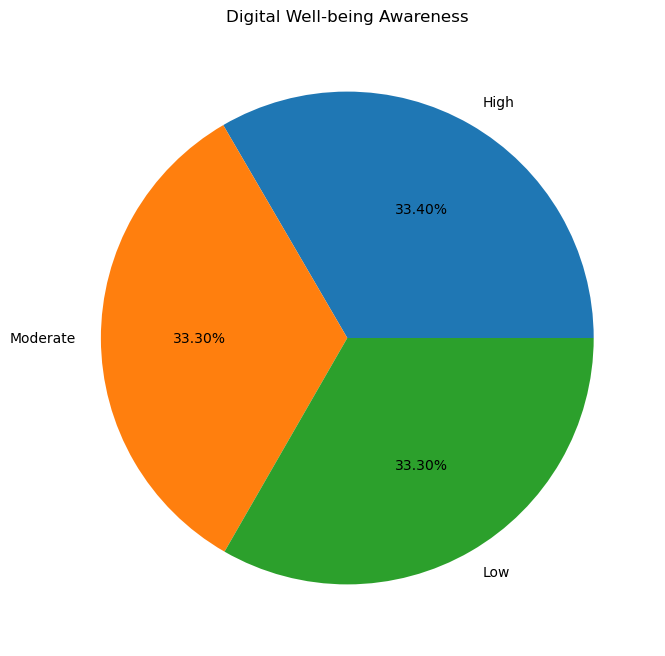

In [23]:
wellbeing = social_df['digital_well-being_awareness'].value_counts()

wellbeing.plot(kind='pie', autopct='%1.2f%%', figsize=(8, 8))
plt.title('Digital Well-being Awareness')
plt.ylabel('')
plt.show()

In [24]:
frequency_table2 = cat.group_aged.value_counts()
proportion_table2 = cat.group_aged.value_counts(normalize=True)

In [25]:
frequency_proportion2 = pd.concat([frequency_table2,proportion_table2], axis = 1)
frequency_proportion2.columns = ['absolute_frequency', 'relative_frequency']

In [26]:
total_absolute2 = frequency_table2.sum()
total_relative2 = proportion_table2.sum()

In [27]:
total_row2 = pd.DataFrame({
    'absolute_frequency': [total_absolute2],
    'relative_frequency': [total_relative2]
}, index=['Total'])

In [28]:
df2 = pd.concat([frequency_proportion2, total_row2])
df2.round(3)

absolute_frequency  relative_frequency
middle_aged_adults               86862               0.290
older_adults                     86639               0.289
adults                           57400               0.191
young_adults                     40155               0.134
teenagers                        28925               0.096
seniors                             19               0.000
Total                           300000               1.000

/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_2376/2261376830.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


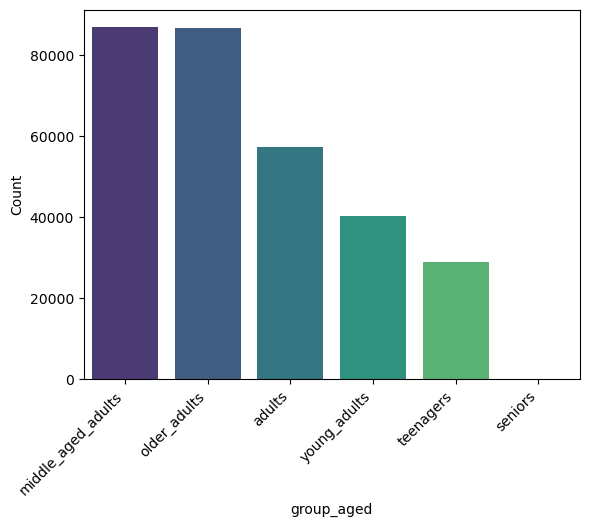

In [29]:
sns.barplot(
    x='group_aged',
    y='absolute_frequency',
    data=frequency_proportion2,
    palette='viridis',
)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
social_df.social_media_time_group.value_counts()

social_media_time_group
High      120110
Medium    119831
Low        60059
Name: count, dtype: int64

In [31]:
frequency_table3 = cat.social_media_time_group.value_counts()
proportion_table3 = cat.social_media_time_group.value_counts(normalize=True)

In [32]:
frequency_proportion3 = pd.concat([frequency_table3,proportion_table3], axis = 1)
frequency_proportion3.columns = ['absolute_frequency', 'relative_frequency']

In [33]:
total_absolute3 = frequency_table3.sum()
total_relative3 = proportion_table3.sum()

In [34]:
total_row3 = pd.DataFrame({
    'absolute_frequency': [total_absolute3],
    'relative_frequency': [total_relative3]
}, index=['Total'])

In [35]:
df3 = pd.concat([frequency_proportion3, total_row3])
df3.round(3)

absolute_frequency  relative_frequency
High                120110               0.400
Medium              119831               0.399
Low                  60059               0.200
Total               300000               1.000

/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_2376/2417600249.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


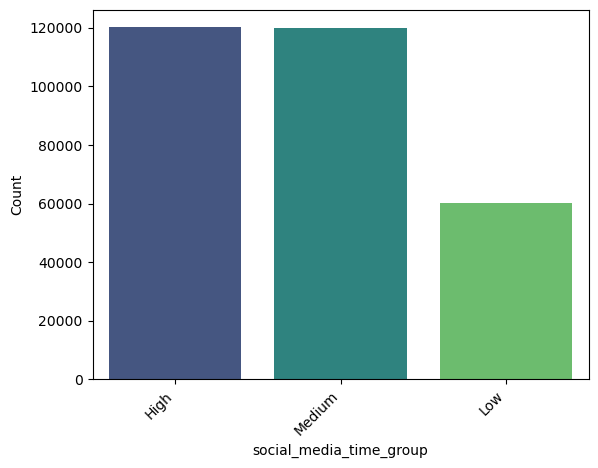

In [36]:
sns.barplot(
    x='social_media_time_group',
    y='absolute_frequency',
    data=frequency_proportion3,
    palette='viridis',
)
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
hours_byapp = social_df.groupby("primary_platform")[["age", "daily_social_media_time_(hrs)"]].mean()
hours_byapp.reset_index().round(2)

primary_platform    age  daily_social_media_time_(hrs)
0         Facebook  38.46                           4.26
1        Instagram  38.53                           4.25
2           TikTok  38.61                           4.25
3          Twitter  38.51                           4.25
4          YouTube  38.54                           4.27

In [38]:
hours_byapp = social_df.groupby("primary_platform")[["age", "daily_social_media_time_(hrs)"]].median()
hours_byapp.reset_index().round(2)

primary_platform   age  daily_social_media_time_(hrs)
0         Facebook  38.0                           4.27
1        Instagram  39.0                           4.26
2           TikTok  39.0                           4.25
3          Twitter  39.0                           4.25
4          YouTube  39.0                           4.26

/var/folders/bs/hzz4qdm57z9cct0t_9rdynfr0000gn/T/ipykernel_2376/4236265707.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=social_df, x='primary_platform', y='daily_social_media_time_(hrs)', palette='viridis')


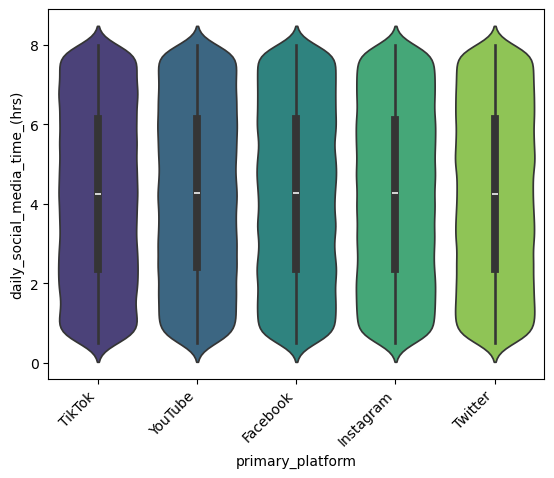

In [39]:
sns.violinplot(data=social_df, x='primary_platform', y='daily_social_media_time_(hrs)', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

In [52]:
social_df['social_media_platforms_used'].value_counts()

social_media_platforms_used
2    60133
4    60074
3    59958
5    59943
1    59892
Name: count, dtype: int64

<h4 style="color: #00BFFF;"> 3.2.2 | Numerical Variables </h4>

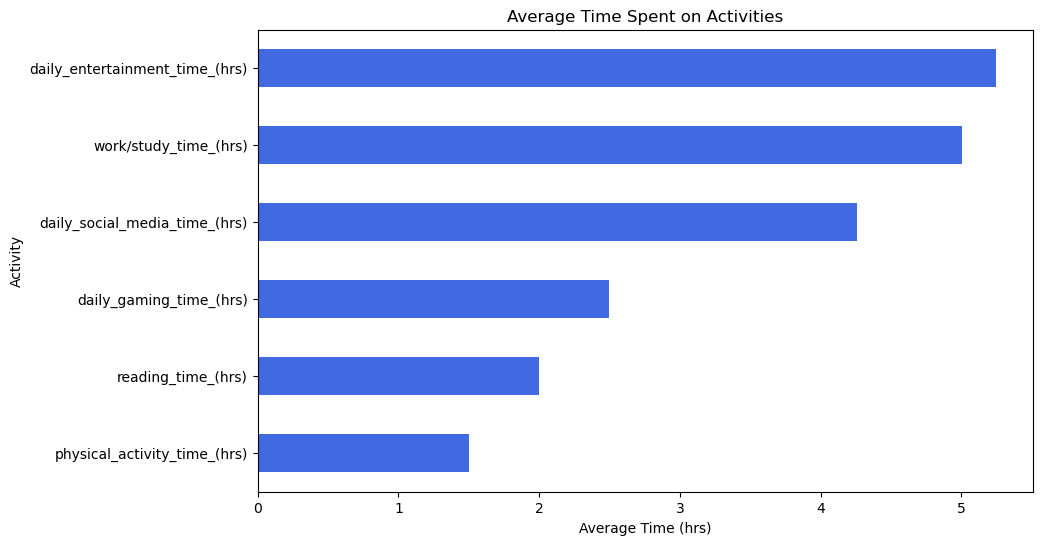

In [40]:
color="#4169E1"
activity_columns = ['daily_social_media_time_(hrs)', 'daily_entertainment_time_(hrs)', 
                    'daily_gaming_time_(hrs)', 'physical_activity_time_(hrs)', 
                    'reading_time_(hrs)', 'work/study_time_(hrs)']
average_time = df[activity_columns].mean().sort_values()

average_time.plot(kind='barh', figsize=(10, 6), color=color)
plt.title('Average Time Spent on Activities')
plt.xlabel('Average Time (hrs)')
plt.ylabel('Activity')
plt.show()

<h4 style="color: #00BFFF;"> 3.2.3 | Numerical vs Categorical Variables </h4>

In [41]:
round(social_df.groupby(['marital_status', 'gender'])['monthly_income_(usd)'].agg(['mean', 'std', 'max', 'min', 'median']))

mean     std      max    min  median
marital_status gender                                        
Divorced       Female  5268.0  2740.0  10000.0  500.0  5291.0
               Male    5253.0  2750.0  10000.0  501.0  5254.0
               Other   5237.0  2732.0  10000.0  500.0  5261.0
Married        Female  5249.0  2734.0   9999.0  500.0  5241.0
               Male    5255.0  2746.0  10000.0  500.0  5256.0
               Other   5253.0  2743.0  10000.0  500.0  5250.0
Single         Female  5255.0  2735.0  10000.0  501.0  5243.0
               Male    5257.0  2742.0   9999.0  501.0  5258.0
               Other   5264.0  2744.0  10000.0  500.0  5275.0
Widowed        Female  5315.0  2745.0  10000.0  500.0  5332.0
               Male    5251.0  2745.0  10000.0  500.0  5250.0
               Other   5226.0  2738.0   9997.0  500.0  5197.0

In [42]:
round(social_df.groupby(['group_aged', 'gender'])['daily_social_media_time_(hrs)'].agg(['mean','median']))

mean  median
group_aged         gender              
adults             Female   4.0     4.0
                   Male     4.0     4.0
                   Other    4.0     4.0
middle_aged_adults Female   4.0     4.0
                   Male     4.0     4.0
                   Other    4.0     4.0
older_adults       Female   4.0     4.0
                   Male     4.0     4.0
                   Other    4.0     4.0
seniors            Female   5.0     5.0
                   Male     1.0     1.0
                   Other    4.0     4.0
teenagers          Female   4.0     4.0
                   Male     4.0     4.0
                   Other    4.0     4.0
young_adults       Female   4.0     4.0
                   Male     4.0     4.0
                   Other    4.0     4.0

<h3 style="color: #4169E1;"> 3.3 | Checking Distributions</h3>

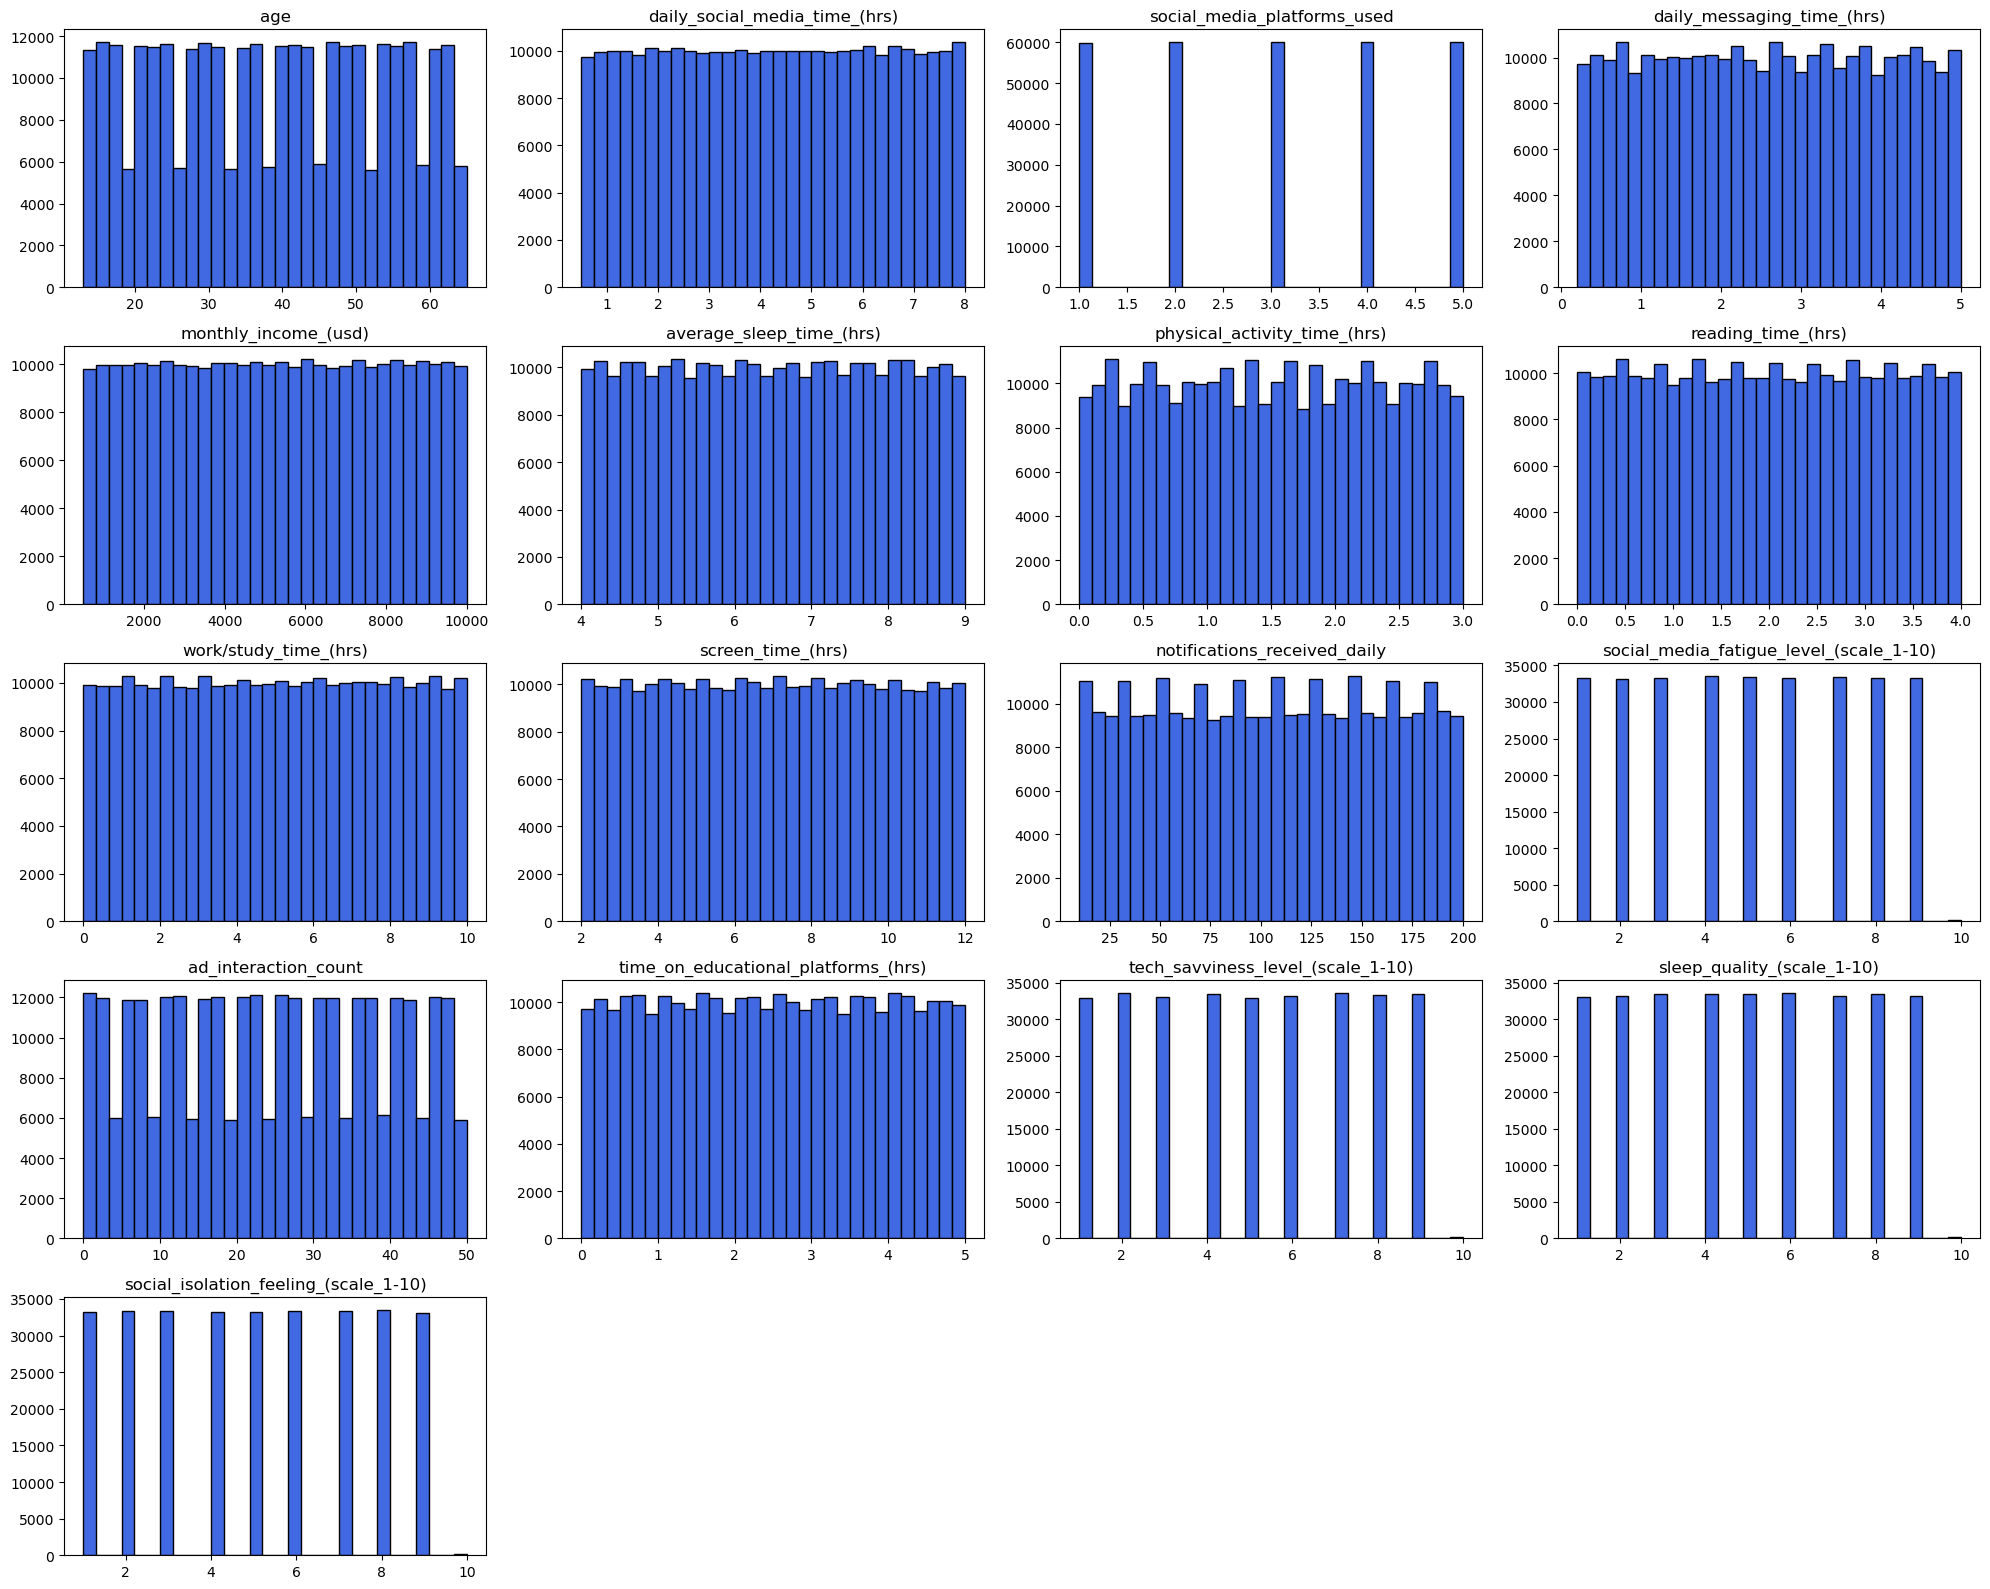

In [43]:
color = "#4169E1"

nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

<h3 style="color: #4169E1;"> 3.3 | Checking our target distribution</h3>

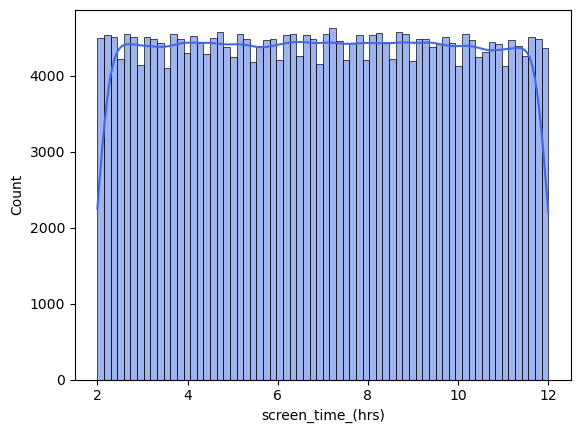

In [44]:
# Without the filter 650.000 and taking out the outliers. 
sns.histplot(social_df["screen_time_(hrs)"], color=color, kde=True);

<h3 style="color: #4169E1;">3.4 | Checking Outliers </h3>

<h3 style="color: #4169E1;">3.5 | Looking for Correlations </h3>

In [45]:
num_corr = num.corr()
num_corr

age  \
age                                      1.000000e+00   
daily_social_media_time_(hrs)           -2.226007e-03   
social_media_platforms_used              1.149363e-03   
daily_messaging_time_(hrs)               2.862393e-03   
monthly_income_(usd)                    -3.198478e-04   
average_sleep_time_(hrs)                 1.647066e-04   
physical_activity_time_(hrs)            -5.417317e-04   
reading_time_(hrs)                       5.390211e-04   
work/study_time_(hrs)                   -3.192196e-03   
screen_time_(hrs)                       -8.739943e-04   
notifications_received_daily             4.780558e-07   
social_media_fatigue_level_(scale_1-10) -3.877554e-03   
ad_interaction_count                     1.403859e-03   
time_on_educational_platforms_(hrs)      6.454289e-04   
tech_savviness_level_(scale_1-10)       -1.521944e-03   
sleep_quality_(scale_1-10)              -1.256145e-04   
social_isolation_feeling_(scale_1-10)    2.917330e-03   

                                         daily_social_media_time_(hrs)  \
age                                                          -0.002226   
daily_social_media_time_(hrs)                                 1.000000   
social_media_platforms_used                                  -0.003449   
daily_messaging_time_(hrs)                                   -0.000277   
monthly_income_(usd)                                         -0.001980   
average_sleep_time_(hrs)                                      0.000544   
physical_activity_time_(hrs)                                  0.000918   
reading_time_(hrs)                                            0.001905   
work/study_time_(hrs)                                        -0.000158   
screen_time_(hrs)                                            -0.000562   
notifications_received_daily                                  0.004397   
social_media_fatigue_level_(scale_1-10)                      -0.001208   
ad_interaction_count                                          0.000079   
time_on_educational_platforms_(hrs)                          -0.001050   
tech_savviness_level_(scale_1-10)                            -0.003132   
sleep_quality_(scale_1-10)                                    0.000172   
social_isolation_feeling_(scale_1-10)                         0.000383   

                                         social_media_platforms_used  \
age                                                         0.001149   
daily_social_media_time_(hrs)                              -0.003449   
social_media_platforms_used                                 1.000000   
daily_messaging_time_(hrs)                                 -0.001502   
monthly_income_(usd)                                        0.000534   
average_sleep_time_(hrs)                                   -0.000126   
physical_activity_time_(hrs)                               -0.000089   
reading_time_(hrs)                                         -0.000058   
work/study_time_(hrs)                                       0.001272   
screen_time_(hrs)                                          -0.000184   
notifications_received_daily                                0.000398   
social_media_fatigue_level_(scale_1-10)                     0.000099   
ad_interaction_count                                        0.002200   
time_on_educational_platforms_(hrs)                         0.000654   
tech_savviness_level_(scale_1-10)                           0.000373   
sleep_quality_(scale_1-10)                                  0.000203   
social_isolation_feeling_(scale_1-10)                      -0.001001   

                                         daily_messaging_time_(hrs)  \
age                                                        0.002862   
daily_social_media_time_(hrs)                             -0.000277   
social_media_platforms_used                               -0.001502   
daily_messaging_time_(hrs)                                 1.000000   
monthly_income_(usd)                  

Text(0.5, 1.0, 'Correlation Heatmap')

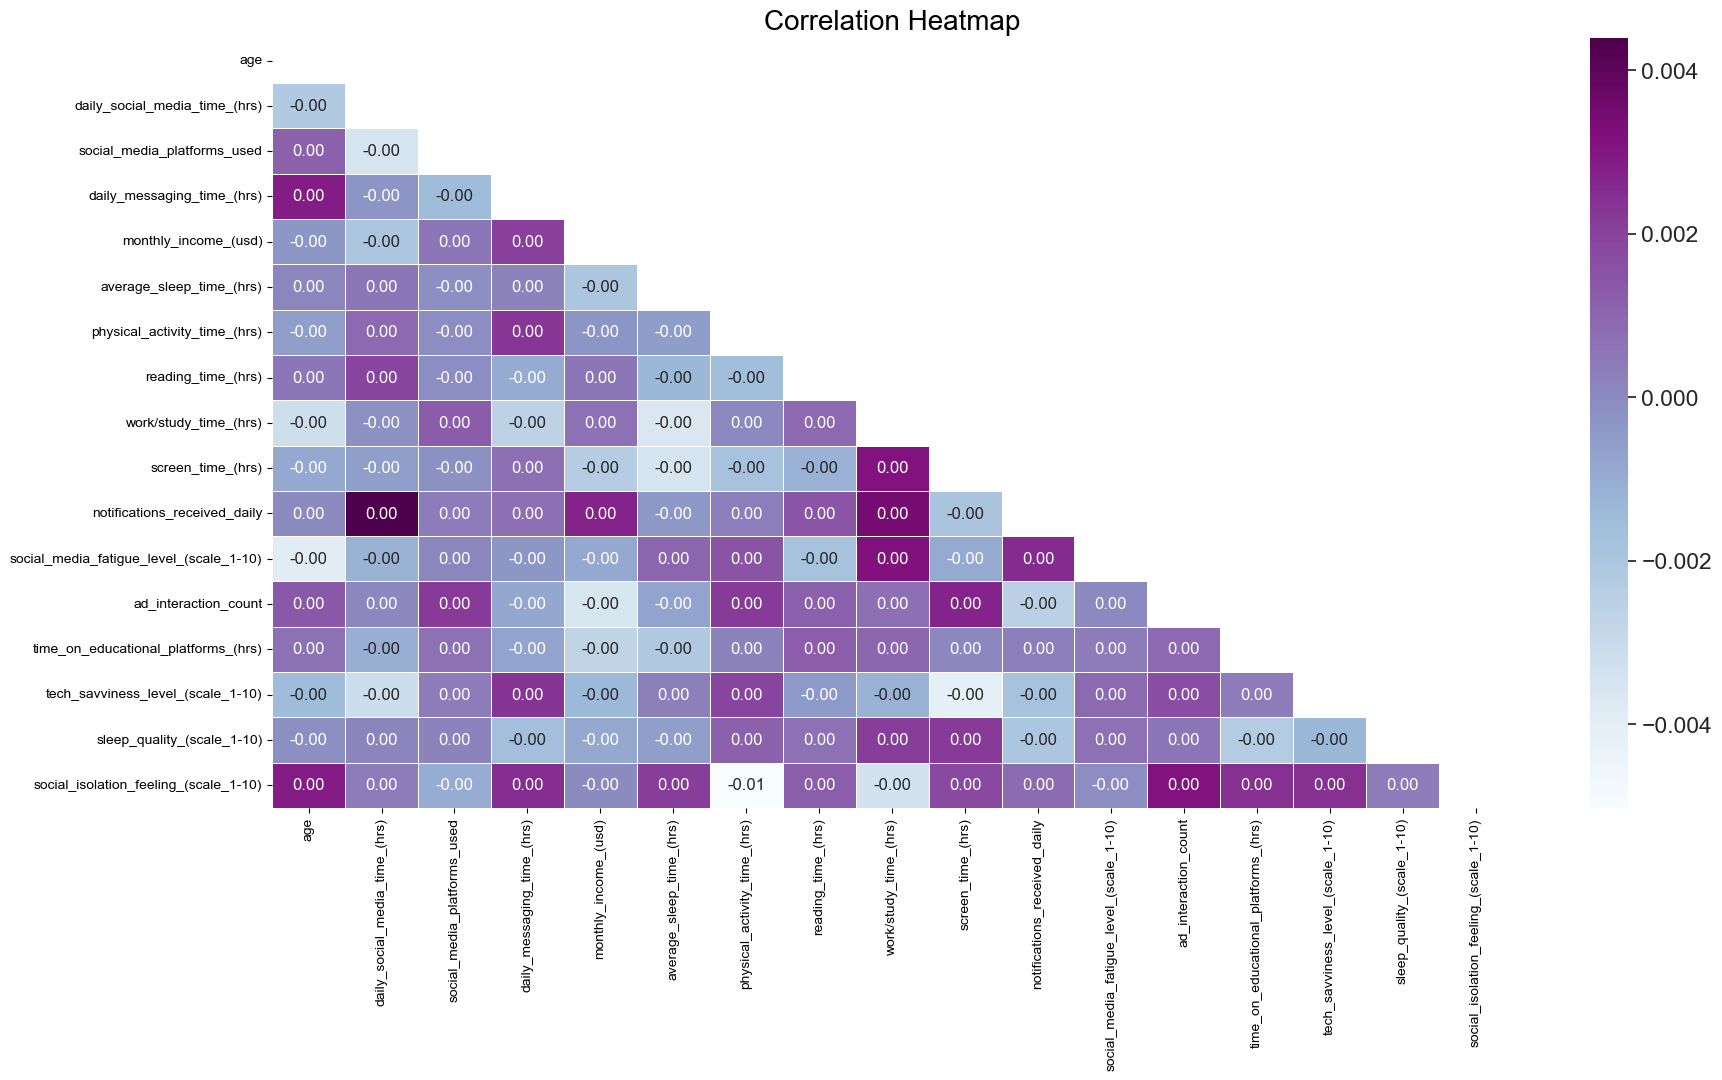

In [46]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5)

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="BuPu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Correlation Heatmap", fontsize=20) 

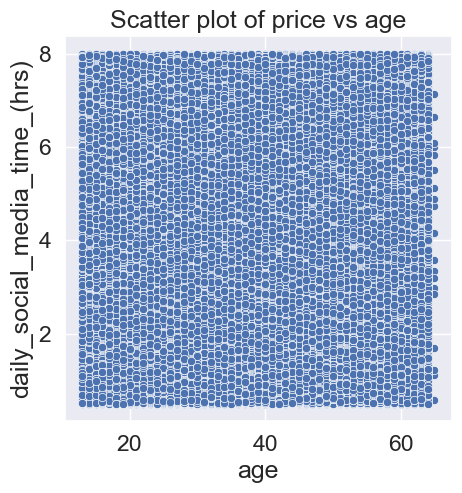

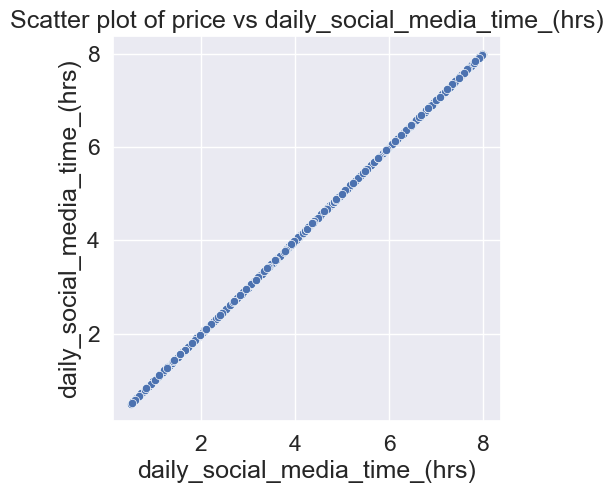

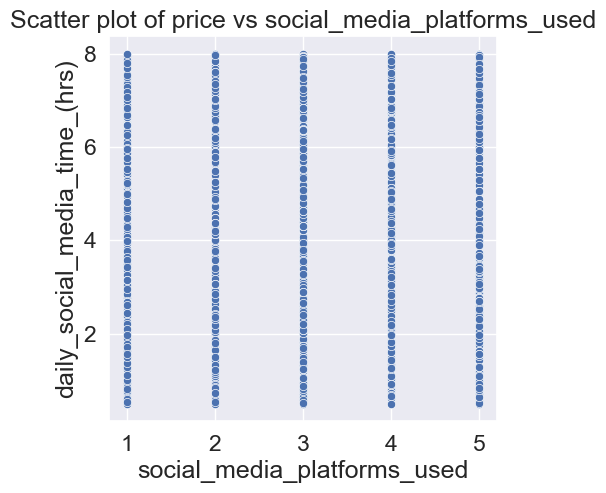

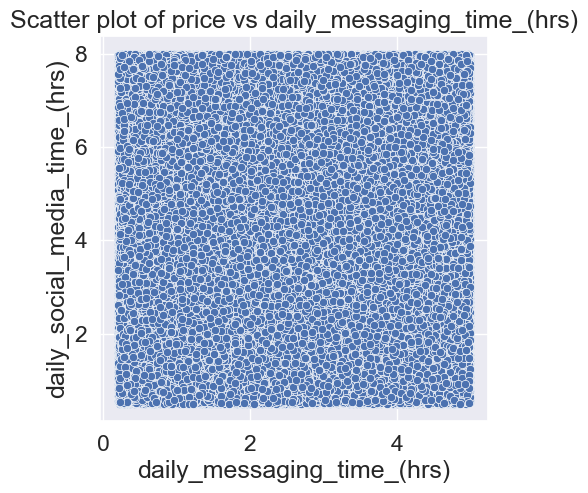

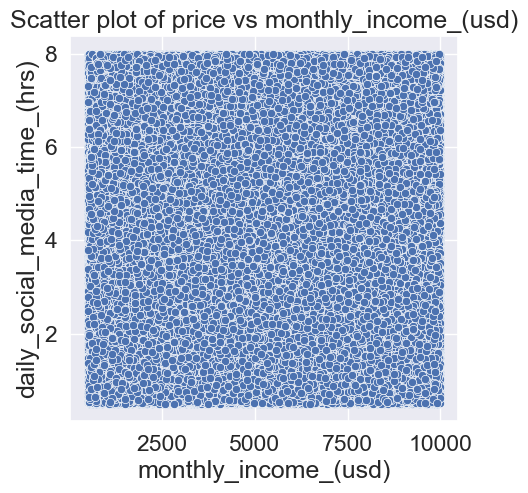

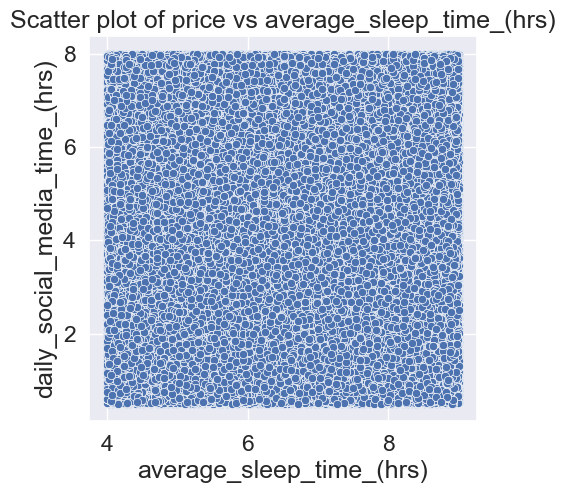

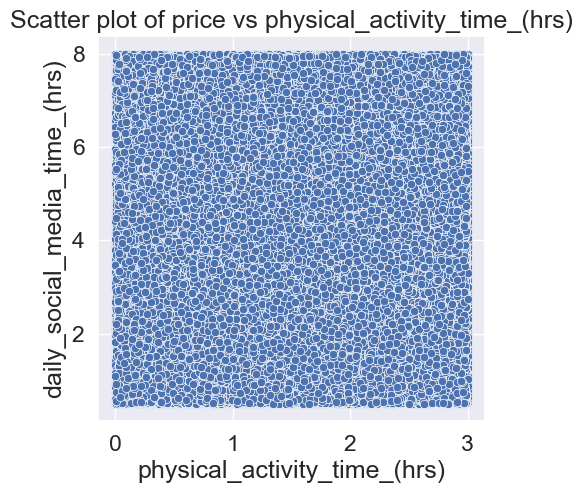

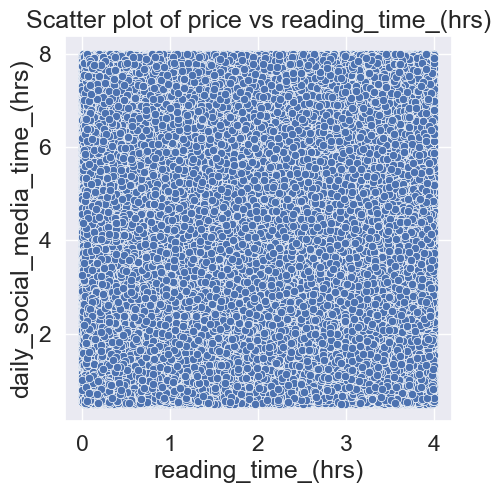

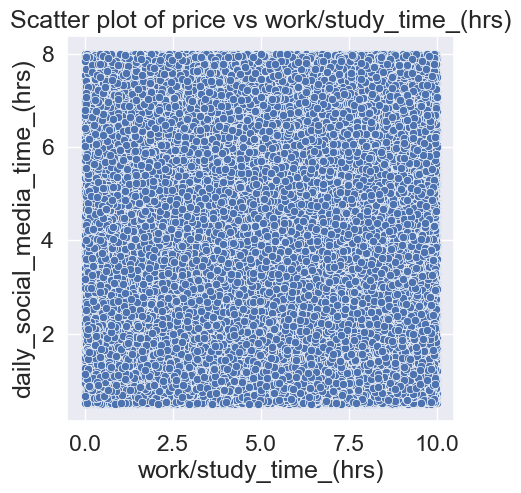

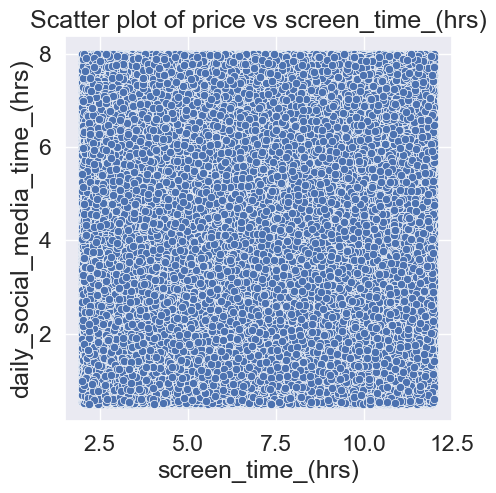

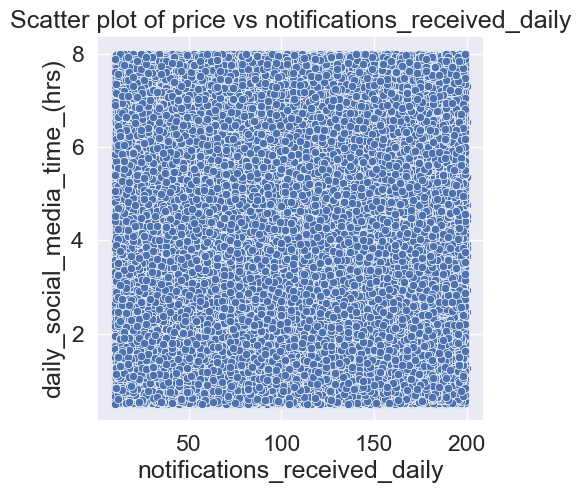

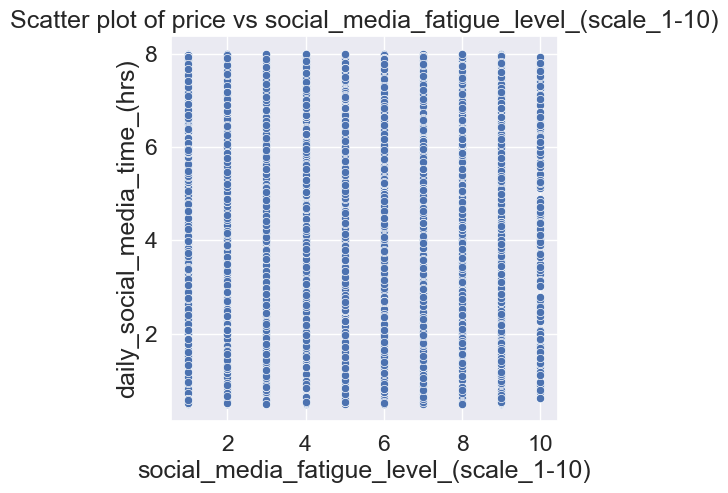

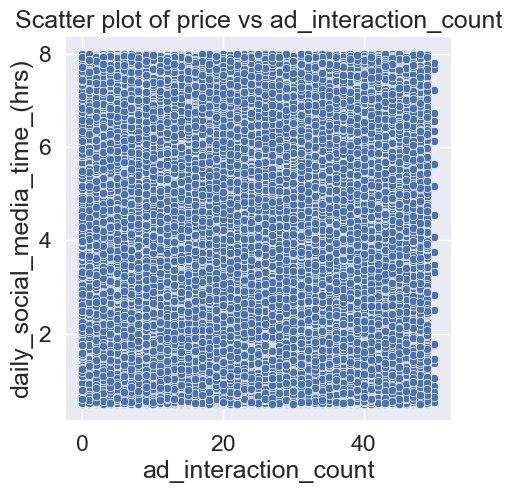

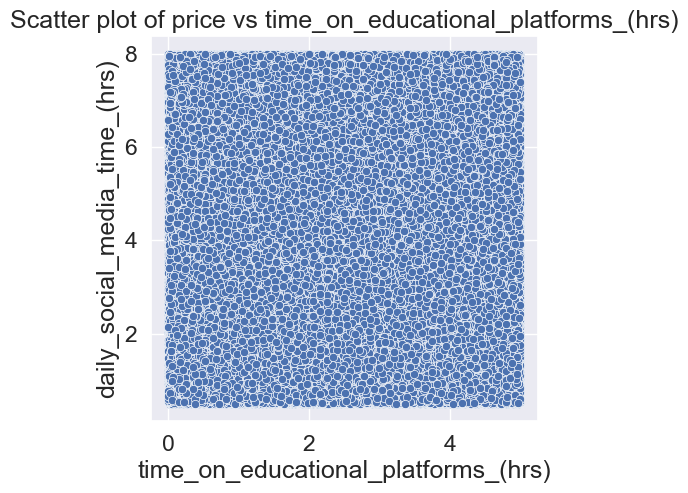

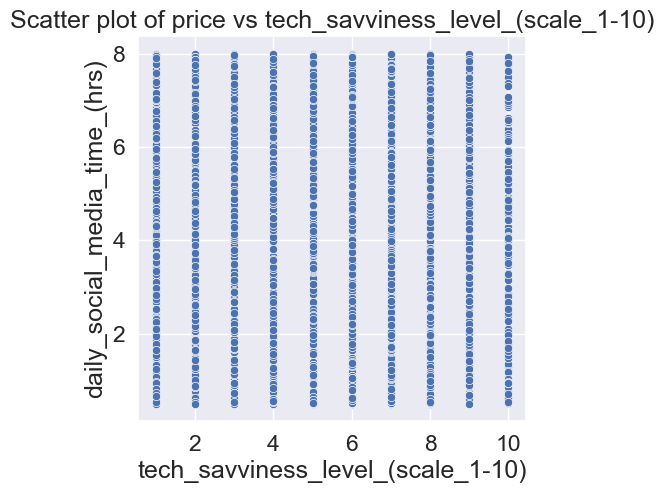

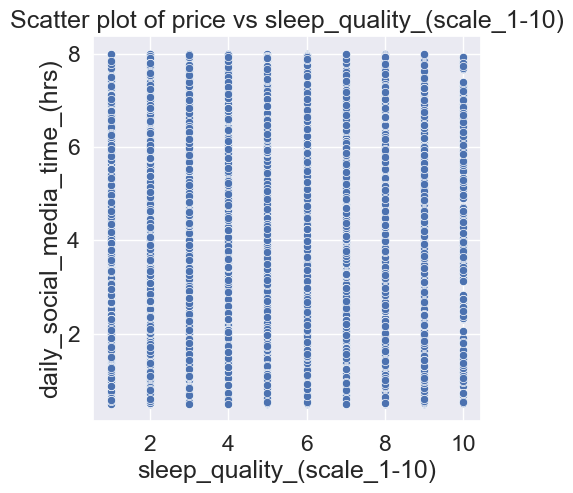

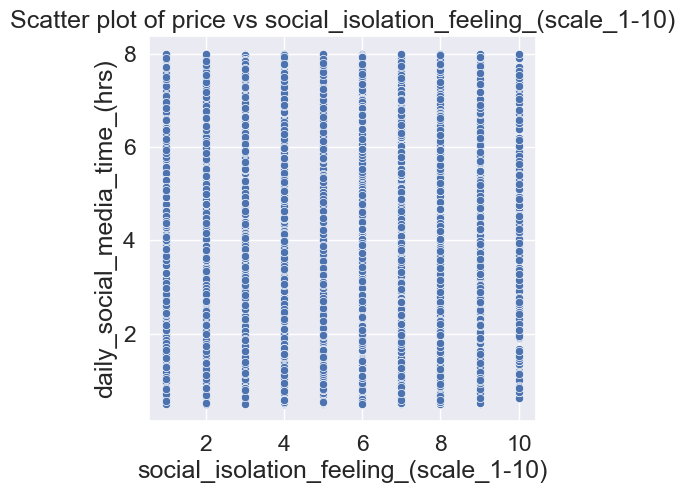

In [47]:
# Plotting scatter plots for each numerical column against 'currentprice' to visualize their relationships
for col in num.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of price vs ' + col)
    sns.scatterplot(data=social_df, x=col, y='daily_social_media_time_(hrs)')
    plt.show()

<h2 style="color: #9370DB;"> 04 | Python - SQL Connection </h2>

In [48]:
def create_connection():
    password = getpass("Please, kindly insert your password: ")
    cnx = pymysql.connect(user='root', password=password, host='localhost')
    
    if cnx.open:
        print("Connection successfully opened.")
        print()
        cursor = cnx.cursor()
        cursor.execute("SHOW DATABASES")
        databases = cursor.fetchall()
        print("Available databases:")
        db_list = [db[0] for db in databases]
        for db in db_list:
            print(f"- {db}")
        print()
    else:
        print("Failed to open connection.")
        print()
        return None
    
    while True:
        database = input("Please, kindly insert your database name: ")
        if database in db_list:
            cnx.select_db(database)
            break
        else:
            print("Invalid database name. Please choose from the available databases.")
            print()
    
    return cnx

In [49]:
# To test it. 
# connection = create_connection()

In [50]:
connection.select_db('XXX')

NameError: name 'connection' is not defined

In [ ]:
connection.close()

<h3 style="color: #4169E1;"> 4.1 | ETL: Data Storage </h3>

In [35]:
# Transfering data using Wizard. Randomly delete 25.000 rows for obvious purposes. 
sampled_data = social_df.sample(n=5000, random_state=42)

In [36]:
sampled_data.to_csv('small_social_media.csv')

sampled_data.to_csv('small_social_media.csv')

In [ ]:
df

In [ ]:
connection.select_db("mini_projectDB")

In [ ]:
# Create a new table in the new schema to store ISS data
create_table_query = """
CREATE TABLE IF NOT EXISTS social_media (
    age INT,
    gender VARCHAR(25),
    country VARCHAR(25),
    daily_social_media_time_(hrs) FLOAT,
    social_media_platforms_used INT,
    primary_platform VARCHAR(25),
    daily_messaging_time(hrs) FLOAT,
    occupation VARCHAR(50), 
    marital_status VARCHAR(50),
    monthly_income_(usd) FLOAT, 
    device_type VARCHAR(25), 
    average_sleep_time(hrs) FLOAT, 
    physical_activity_time(hrs) FLOAT, 
    reading_time FLOAT,
    screen_time_(hrs) FLOAT
);
"""

# For best usage on VARCHAR, check the maximum length of the data
# BIGINT is used for timestamp because it is in Unix format meaning it is in seconds since 1970
# To add --> primary key auto increment

In [ ]:
social_df.columns